In [33]:
import numpy as np
import cv2
from show_image import show_rgb_image
from show_image import show_images
%matplotlib inline

---

- ## 히스토그램
    - #### 값의 개수를 겹치지 않는 다양한 계급으로 표시
    - #### 어떤 데이터가 얼마나 많은지를 나타냄

[[187 189 185 ..., 186 184 183]
 [186 189 185 ..., 187 185 184]
 [186 189 185 ..., 187 187 186]
 ..., 
 [120 120 113 ..., 209 207 207]
 [112 107 102 ..., 184 188 193]
 [116 106 102 ..., 143 141 145]]


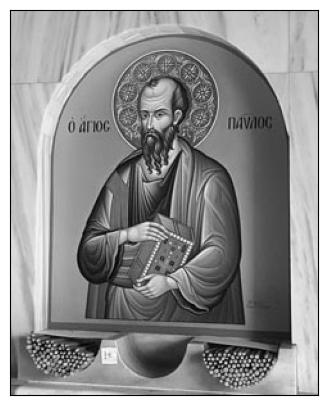

In [35]:
image = cv2.imread("./images/chap06/pixel.jpg", cv2.IMREAD_GRAYSCALE)
print(image)
show_images({"": image}, 5)

- ### cv2.calcHist(images, channels, mask, histSize, ranges)
    - #### images: 원본 배열들
    - #### channels: 계산에 사용하는 차원 목록
    - #### mask: 특정 행렬만 계산하기 위한 마스크
    - #### histSize: 계급(bin) 개수 목록
    - #### ranges: 각 차원의 히스토그램 범위

- #### bin(구간)이 32개이고, 범위가 0~255인 histogram 생성
    - #### 256개 픽셀값을 32개의 구간으로 나누었음
        - ##### ((0 ~ 7), (8 ~ 15), ...)

In [24]:
hist = cv2.calcHist([image], [0], None, [32], [0,256])
hist.flatten()

array([  97.,  247.,  563., 1001., 1401., 1575., 1724., 1951., 2853.,
       3939., 3250., 2549., 2467., 2507., 2402., 2418., 2727., 3203.,
       3410., 3161., 2985., 2590., 3384., 4312., 4764., 3489., 2802.,
       2238., 1127.,  628.,  199.,   37.], dtype=float32)

- #### 원리 이해하기 위해 사용자 함수로 작성

In [26]:
def get_hist(image, bin, ranges=[0,256]):
    range_min, range_max = ranges
    bin_size = range_max // bin

    hist = np.zeros((bin, 1), dtype="float32")

    for y in image:
        for x in y:
            hist[x // bin_size] += 1
    return hist

get_hist(image, 32).flatten()

array([  97.,  247.,  563., 1001., 1401., 1575., 1724., 1951., 2853.,
       3939., 3250., 2549., 2467., 2507., 2402., 2418., 2727., 3203.,
       3410., 3161., 2985., 2590., 3384., 4312., 4764., 3489., 2802.,
       2238., 1127.,  628.,  199.,   37.], dtype=float32)

---

- ### 히스토그램 그래프 그리기

In [28]:
from datascience import *

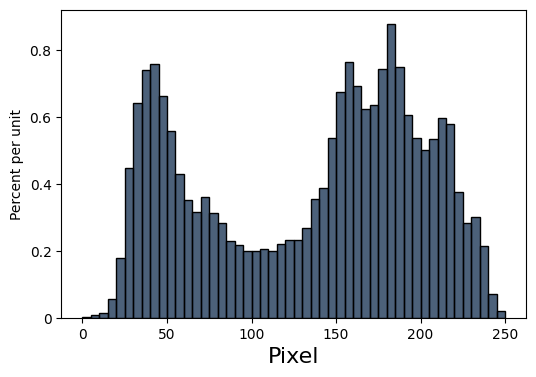

In [63]:
image = cv2.imread("./images/chap06/draw_hist.jpg", cv2.IMREAD_GRAYSCALE)
Table().with_column(
    "Pixel", image.flatten()
).hist(bins=np.arange(0, 255, 5))

---

- ### 히스토그램 스트레칭
    - #### 명암 분포가 좁은 히스토그램을 좌우로 잡아당겨 고른 명암 분포를 가진 히스토그램이 되게 함

$$ 새 화소값 = \frac{(화소값 - low)}{high - low} * 255 $$

- #### 원래 이미지

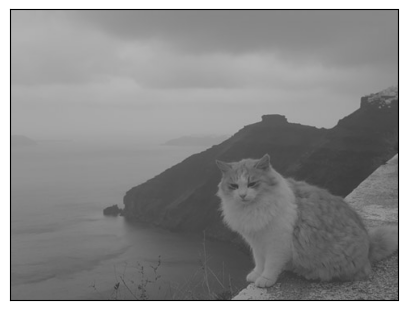

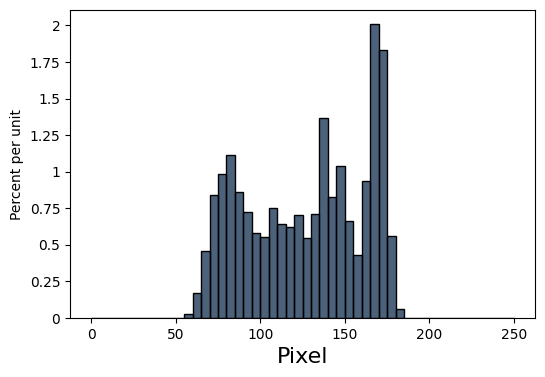

In [69]:
image = cv2.imread("./images/chap06/hist_stretch.jpg", cv2.IMREAD_GRAYSCALE)

show_images({"": image}, 5)

Table().with_column(
    "Pixel", image.flatten()
).hist(bins=np.arange(0, 255, 5))

- #### 스트레칭한 이미지

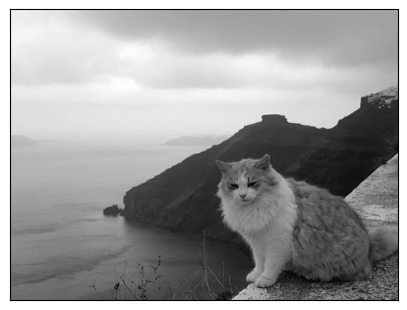

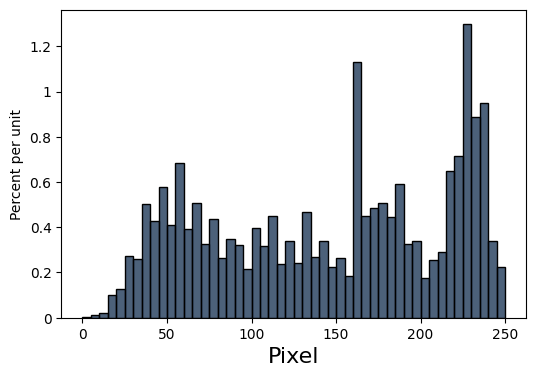

In [70]:
min_val, max_val, _, _ = cv2.minMaxLoc(image)

new_image = cv2.subtract(image, min_val)
new_image = new_image * (255 / (max_val - min_val))
new_image = np.clip(new_image, 0, 255).astype("uint8")

show_images({"": new_image}, 5)

Table().with_column(
    "Pixel", new_image.flatten()
).hist(bins=np.arange(0, 255, 5))